In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Part 1: Data Exploration

In [3]:
# Load the scikit-learn diabetes bunch object into a variable

diabetes_data = datasets.load_diabetes()

# Create a Pandas DataFrame from the data, feature_names, and target attributes within the bunch

df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

df['target'] = diabetes_data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
# Construct the correlation matrix

corr = df.corr()
print(corr)

corr_target = corr['target'].drop('target').sort_values(ascending=False)
print(corr_target)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp      0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1      0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5      0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6      0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

              s4        s5        s6   

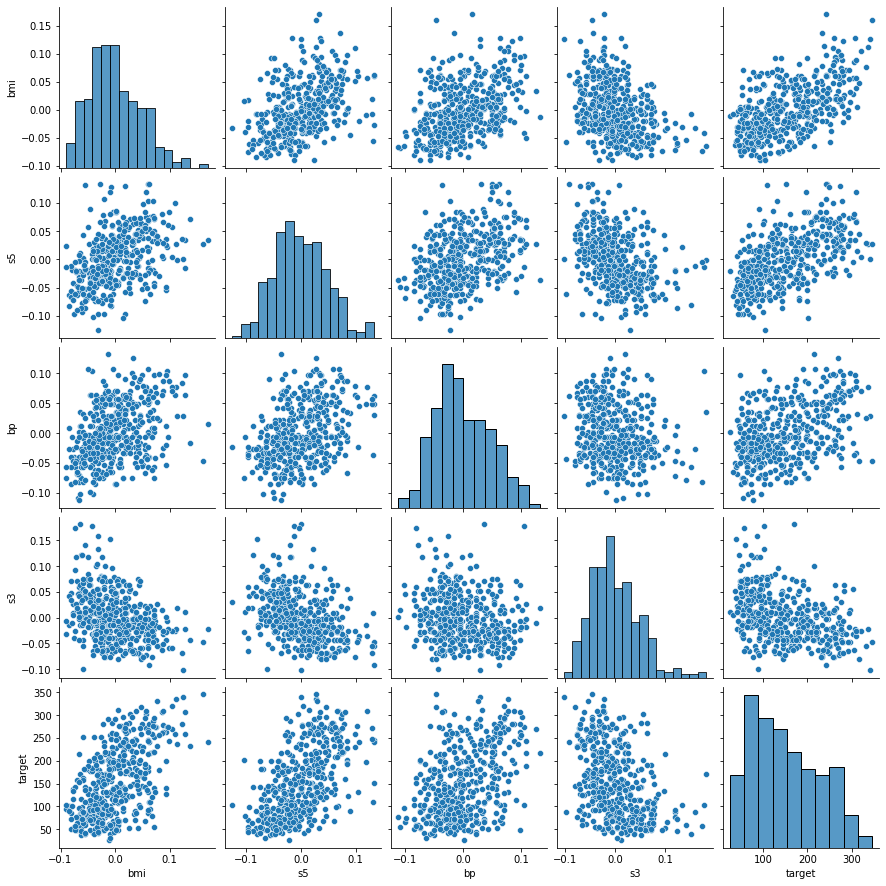

In [10]:
# plot top 4 correlated features with target

top_4 = ['bmi', 's5', 'bp', 's3', 'target']

sns.pairplot(df[top_4])
plt.show()

In [11]:
# training and testing data sets

x = df.drop(columns=['target'])
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=432)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((353, 10), (89, 10), (353,), (89,))

# Part 2: Model Training

In [13]:
# Instantiate following models

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=432)
random_forest_reg = RandomForestRegressor(random_state=432)

In [17]:
def evaluate_model(model, x_train, y_train):
    # cross-validation using RMSE
    rmse_scores = cross_val_score(model, x_train, y_train, 
                                  scoring='neg_root_mean_squared_error', cv=5)
    rmse_scores = -rmse_scores

    print(f"RMSE values: {rmse_scores}")
    print(f"Mean RMSE: {rmse_scores.mean()}")
    print(f"RMSE Standard Deviation: {rmse_scores.std()}")

# Linear Regressor
print("Linear Regression:")
evaluate_model(linear_reg, x_train, y_train)

# Decision Tree Regressor
print("\nDecision Tree Regression:")
evaluate_model(decision_tree_reg, x_train, y_train)

# Random Forest Regressor
print("\nRandom Forest Regression:")
evaluate_model(random_forest_reg, x_train, y_train)

Linear Regression:
RMSE values: [51.39990263 56.37122713 52.4969261  60.55184634 54.76744379]
Mean RMSE: 55.11746919920679
RMSE Standard Deviation: 3.2222485614442165

Decision Tree Regression:
RMSE values: [81.02946777 78.24870066 71.87518524 86.32025089 84.30785424]
Mean RMSE: 80.35629176092095
RMSE Standard Deviation: 5.059800954716738

Random Forest Regression:
RMSE values: [56.17265412 58.21400646 52.63297409 61.1330771  60.05314737]
Mean RMSE: 57.64117182676781
RMSE Standard Deviation: 3.019197136741776


In [19]:
# single feature linear regressor

x_train_bmi = x_train[['bmi']]

print("BMI Linear Regression:")
evaluate_model(linear_reg, x_train_bmi, y_train)

BMI Linear Regression:
RMSE values: [63.32371968 66.52854268 57.39954301 64.87527931 61.60305958]
Mean RMSE: 62.74602885238086
RMSE Standard Deviation: 3.1326070512404702


# Part 3: Decision Tree Regressor Tuning

In [20]:
print(decision_tree_reg.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 432, 'splitter': 'best'}


In [23]:
param_grid = {'max_depth': list(range(1, 20)),
    'min_samples_leaf': list(range(1, 51))}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=432), 
                           param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', 
                           cv=5, verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=432),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [28]:
print("Best Parameters:")
print(grid_search.best_params_)

print("\nBest Model:")
print(grid_search.best_estimator_)

Best Parameters:
{'max_depth': 3, 'min_samples_leaf': 35}

Best Model:
DecisionTreeRegressor(max_depth=3, min_samples_leaf=35, random_state=432)


In [44]:
params = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

rmse_scores = -mean_test_scores

print("Hyperparameter combinations & corresponding RMSE values:")
for param, rmse in zip(params, rmse_scores):
    print(f"Parameters: {param}, RMSE: {rmse}")

Hyperparameter combinations & corresponding RMSE values:
Parameters: {'max_depth': 1, 'min_samples_leaf': 1}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 2}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 3}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 4}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 5}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 6}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 7}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 8}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 9}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 10}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 11}, RMSE: 66.66906545663558
Parameters: {'max_depth': 1, 'min_samples_leaf': 12}, RMSE: 66.66906545663558
Parameters: {'ma

# Part 4: Random Forest Regressor Tuning

In [32]:
print(random_forest_reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 432, 'verbose': 0, 'warm_start': False}


In [33]:
param_grid_rf = {'n_estimators': [100, 200, 400, 500],
    'max_features': [2, 4, 6, 8, 10]}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=432), 
                              param_grid=param_grid_rf, 
                              scoring='neg_root_mean_squared_error', 
                              cv=5, verbose=1)

grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=432),
             param_grid={'max_features': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 400, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [34]:
print("Best Hyperparameters:")
print(grid_search_rf.best_params_)

print("\nBest Model:")
print(grid_search_rf.best_estimator_)

Best Hyperparameters:
{'max_features': 2, 'n_estimators': 200}

Best Model:
RandomForestRegressor(max_features=2, n_estimators=200, random_state=432)


In [43]:
params_rf = grid_search_rf.cv_results_['params']
mean_test_scores_rf = grid_search_rf.cv_results_['mean_test_score']

rmse_scores_rf = -mean_test_scores_rf

print("Hyperparameter combinations & corresponding RMSE values:")
for param, rmse in zip(params_rf, rmse_scores_rf):
    print(f"Parameters: {param}, RMSE: {rmse}")

Hyperparameter combinations & corresponding RMSE values:
Parameters: {'max_features': 2, 'n_estimators': 100}, RMSE: 56.56318934915637
Parameters: {'max_features': 2, 'n_estimators': 200}, RMSE: 56.2252065662815
Parameters: {'max_features': 2, 'n_estimators': 400}, RMSE: 56.3063285943641
Parameters: {'max_features': 2, 'n_estimators': 500}, RMSE: 56.301186629491006
Parameters: {'max_features': 4, 'n_estimators': 100}, RMSE: 56.68847986788063
Parameters: {'max_features': 4, 'n_estimators': 200}, RMSE: 56.58201558980552
Parameters: {'max_features': 4, 'n_estimators': 400}, RMSE: 56.402988390608115
Parameters: {'max_features': 4, 'n_estimators': 500}, RMSE: 56.29547084266744
Parameters: {'max_features': 6, 'n_estimators': 100}, RMSE: 56.347695738036464
Parameters: {'max_features': 6, 'n_estimators': 200}, RMSE: 56.64034452900942
Parameters: {'max_features': 6, 'n_estimators': 400}, RMSE: 56.60294269357117
Parameters: {'max_features': 6, 'n_estimators': 500}, RMSE: 56.59573835775981
Parame

In [37]:
# feature importance from best estimator

best_rf = grid_search_rf.best_estimator_
feature_importances = best_rf.feature_importances_

feature_importance_pairs = zip(diabetes_data.feature_names, feature_importances)

print("Feature Importance Pairs:")
for feature, importance in feature_importance_pairs:
    print(f"Feature: {feature}, Importance: {importance}")

Feature Importance Pairs:
Feature: age, Importance: 0.06576261977842646
Feature: sex, Importance: 0.014642593768255252
Feature: bmi, Importance: 0.19714304733593038
Feature: bp, Importance: 0.12815479508284572
Feature: s1, Importance: 0.0701965217400304
Feature: s2, Importance: 0.07403913719634117
Feature: s3, Importance: 0.07867432410168686
Feature: s4, Importance: 0.0774324733483738
Feature: s5, Importance: 0.1908786987647331
Feature: s6, Importance: 0.10307578888337696


Describe how the importances compare to the correlation matrix implemented in Part 1c.
- Both correlation and feature importance show BMI as the most significant feature in predicting the target
- Features like s4 & BP have strong correlations but lower feature importance 
- Overall, correlations focus on linear relationships while feature importance shows the non-linear relationships and interactions between features

# Part 5: Model Evaluation and Selection

a. Average RMSE values

1. Linear Regressor with entire training data - 55.12
2. Decision Tree Regressor - 80.36
3. Random Forest Regressor - 57.64
4. Linear Regressor with the single best feature found in Assignment 1 - 61.18
5. Tuned decision tree model from Part 3 of this model - 60.38
6. Tuned random forest model from Part 4 of this model - 56.22

b. The model with the lowest RMSE, linear regression, is the champion model

In [42]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse_test)

52.69830461564053


The test set RMSE of 52.70 is lower than the training set, meaning the model is generalizing well since the performance is slightly better on test data than training data. This suggests the model doesn't have overfitting